In [1]:
from Crypto.Cipher import AES, PKCS1_OAEP
from Crypto.PublicKey import RSA
import os
from Crypto.Util.Padding import pad
from Crypto.Random import get_random_bytes


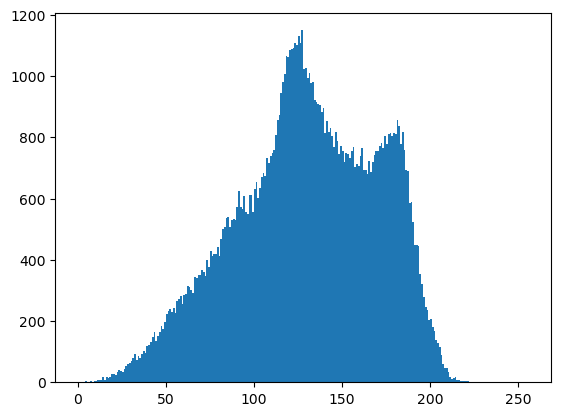

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread(r'C:\Users\KIIT\Desktop\Color-image-baboon-and-its-gray-valued-representation-used-as-transparency_Q320.jpg', 0)

hist, bins = np.histogram(img.ravel(), 256, [0, 256])

plt.hist(img.ravel(), 256, [0, 256])
plt.show()

In [3]:
import numpy as np
from scipy.stats import entropy
from PIL import Image

img = Image.open(r"C:\Users\KIIT\Desktop\Color-image-baboon-and-its-gray-valued-representation-used-as-transparency_Q320.jpg")

gray = np.array(img.convert("L"))

ent = entropy(gray.flatten(), base=2)

print(f"Entropy: {ent}")

Entropy: 16.56886343362656


In [4]:
key=RSA.generate(2048) 

In [5]:
privkey= key.exportKey()                                            
pubkey= key.publickey().exportKey() 

with open('public.pem','wb') as f:                                  
    f.write(pubkey)

with open('private.pem','wb') as f:
    f.write(privkey)

In [6]:

iv = os.urandom(16)

with open('public.pem', 'rb') as f:
    public_key = RSA.import_key(f.read())


key = os.urandom(32)


rsa_cipher = PKCS1_OAEP.new(public_key)
enc_key = rsa_cipher.encrypt(key)


with open(r'C:\Users\KIIT\Desktop\Color-image-baboon-and-its-gray-valued-representation-used-as-transparency_Q320.jpg', 'rb') as f:
    image_data = f.read()


padding_size = 16 - (len(image_data) % 16)
padded_data = image_data + bytes([padding_size] * padding_size)


aes_cipher = AES.new(key, AES.MODE_CBC, iv=iv)


enc_image_data = aes_cipher.encrypt(padded_data)

with open('enc_image.jpg', 'wb') as f:
    f.write(enc_image_data)

with open('enc_key.bin', 'wb') as f:
    f.write(enc_key)


with open('iv.bin', 'wb') as f:
    f.write(iv)


In [7]:
from PIL import Image
fh = open("cipher.txt", "wb")
fh.write(enc_image_data)
fh.close()

with open("cipher.txt", "rb") as f:
    binary_data = f.read()

data_length = len(binary_data)
width = int(data_length ** 0.5)
height = int(data_length / width) + 1


img = Image.new("L", (width, height))


pixels = [int(byte) for byte in binary_data]


img.putdata(pixels)


img.save("cipher_image.jpg")


In [8]:

img = Image.open("cipher_image.jpg")


gray = np.array(img.convert("L"))

ent = entropy(gray.flatten(), base=2)

print(f"Entropy: {ent}")


Entropy: 14.995737849257827


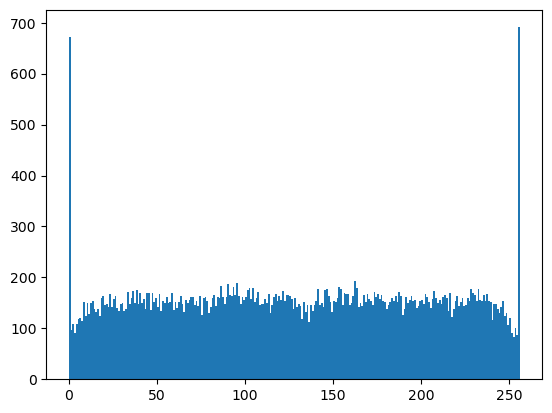

In [9]:

img = cv2.imread(r'cipher_image.jpg', 0)

hist, bins = np.histogram(img.ravel(), 256, [0, 256])


plt.hist(img.ravel(), 256, [0, 256])
plt.show()

In [10]:



with open('private.pem', 'rb') as f:
    private_key = RSA.import_key(f.read())


with open('enc_key.bin', 'rb') as f:
    enc_key = f.read()


rsa_cipher = PKCS1_OAEP.new(private_key)
key = rsa_cipher.decrypt(enc_key)


with open('enc_image.jpg', 'rb') as f:
    enc_image_data = f.read()


with open('iv.bin', 'rb') as f:
    iv = f.read()


aes_cipher = AES.new(key, AES.MODE_CBC, iv=iv)

padded_data = aes_cipher.decrypt(enc_image_data)


padding_size = padded_data[-1]
image_data = padded_data[:-padding_size]


with open('dec_image.jpg', 'wb') as f:
    f.write(image_data)


In [11]:

with open('public.pem', 'rb') as f:
    public_key = RSA.import_key(f.read())


key = os.urandom(32)


aes_cipher = AES.new(key, AES.MODE_ECB)


with open(r'C:\Users\KIIT\Desktop\Color-image-baboon-and-its-gray-valued-representation-used-as-transparency_Q320.jpg', 'rb') as f:
    image_data = f.read()


padding_size = 16 - len(image_data) % 16
padded_data = image_data + bytes([padding_size] * padding_size)


enc_image_data = aes_cipher.encrypt(padded_data)

rsa_cipher = PKCS1_OAEP.new(public_key)
enc_key = rsa_cipher.encrypt(key)


with open('enc_image.jpg', 'wb') as f:
    f.write(enc_image_data)


with open('enc_key.bin', 'wb') as f:
    f.write(enc_key)


In [12]:
from PIL import Image
fh = open("cipher.txt", "wb")
fh.write(enc_image_data)
fh.close()


with open("cipher.txt", "rb") as f:
    binary_data = f.read()


data_length = len(binary_data)
width = int(data_length ** 0.5)
height = int(data_length / width) + 1


img = Image.new("L", (width, height))


pixels = [int(byte) for byte in binary_data]


img.putdata(pixels)


img.save("cipher_image.jpg")


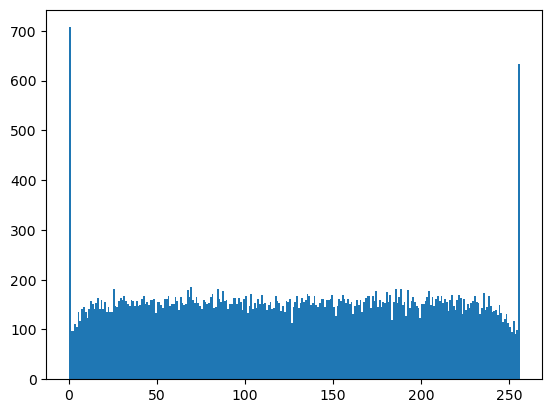

In [13]:

img = cv2.imread(r'cipher_image.jpg', 0)


hist, bins = np.histogram(img.ravel(), 256, [0, 256])


plt.hist(img.ravel(), 256, [0, 256])
plt.show()

In [14]:


img = Image.open("cipher_image.jpg")


gray = np.array(img.convert("L"))


ent = entropy(gray.flatten(), base=2)

print(f"Entropy: {ent}")


Entropy: 14.990685672126515


In [15]:



with open('private.pem', 'rb') as f:
    private_key = RSA.import_key(f.read())

with open('enc_key.bin', 'rb') as f:
    enc_key = f.read()


rsa_cipher = PKCS1_OAEP.new(private_key)
key = rsa_cipher.decrypt(enc_key)

aes_cipher = AES.new(key, AES.MODE_ECB)


with open('enc_image.jpg', 'rb') as f:
    enc_image_data = f.read()


padded_data = aes_cipher.decrypt(enc_image_data)


padding_size = padded_data[-1]
image_data = padded_data[:-padding_size]

with open('dec_image.jpg', 'wb') as f:
    f.write(image_data)


In [16]:

with open('public.pem', 'rb') as f:
    public_key = RSA.import_key(f.read())


key =  get_random_bytes(16)


rsa_cipher = PKCS1_OAEP.new(public_key)
enc_key = rsa_cipher.encrypt(key)


with open(r'C:\Users\KIIT\Desktop\Color-image-baboon-and-its-gray-valued-representation-used-as-transparency_Q320.jpg','rb') as f:
    image_data = f.read()

nonce = os.urandom(8)


aes_cipher = AES.new(key, AES.MODE_CTR, nonce=nonce)


enc_image_data = aes_cipher.encrypt(image_data)


with open('enc_key.bin', 'wb') as f:
    f.write(enc_key)

with open('enc_image.jpg', 'wb') as f:
    f.write(enc_image_data)


with open('nonce.bin', 'wb') as f:
    f.write(nonce)


In [17]:
from PIL import Image
fh = open("cipher.txt", "wb")
fh.write(enc_image_data)
fh.close()


with open("cipher.txt", "rb") as f:
    binary_data = f.read()

data_length = len(binary_data)
width = int(data_length ** 0.5)
height = int(data_length / width) + 1


img = Image.new("L", (width, height))

pixels = [int(byte) for byte in binary_data]

img.putdata(pixels)


img.save("cipher_image.jpg")


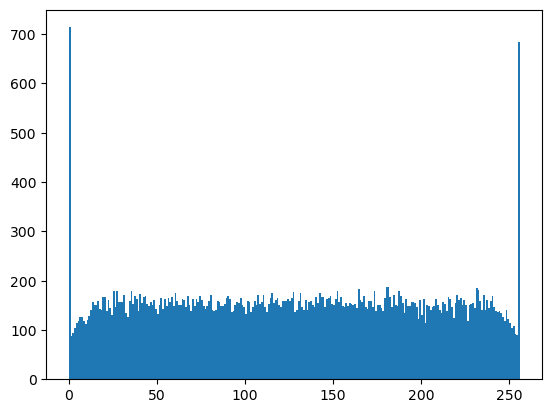

In [18]:

img = cv2.imread(r'cipher_image.jpg', 0)

hist, bins = np.histogram(img.ravel(), 256, [0, 256])

plt.hist(img.ravel(), 256, [0, 256])
plt.show()

In [19]:


img = Image.open("cipher_image.jpg")


gray = np.array(img.convert("L"))


ent = entropy(gray.flatten(), base=2)


print(f"Entropy: {ent}")


Entropy: 14.992559359672127


In [20]:



with open('private.pem', 'rb') as f:
    private_key = RSA.import_key(f.read())

with open('enc_key.bin', 'rb') as f:
    enc_key = f.read()


rsa_cipher = PKCS1_OAEP.new(private_key)
key = rsa_cipher.decrypt(enc_key)


with open('enc_image.jpg', 'rb') as f:
    enc_image_data = f.read()

with open('nonce.bin', 'rb') as f:
    nonce = f.read()


aes_cipher = AES.new(key, AES.MODE_CTR, nonce=nonce)


image_data = aes_cipher.decrypt(enc_image_data)


with open('dec_image.jpg', 'wb') as f:
    f.write(image_data)


In [21]:


aeskey = get_random_bytes(16) #16 bytes = 128bit encryption

with open('private.pem', 'rb') as f:
    pubkey= f.read()
rsakey = RSA.importKey(pubkey)
rsacipher = PKCS1_OAEP.new(rsakey)
e_aeskey = rsacipher.encrypt(aeskey)


with open(r'C:\Users\KIIT\Desktop\Color-image-baboon-and-its-gray-valued-representation-used-as-transparency_Q320.jpg', 'rb') as f:
    data = f.read()

aescipher = AES.new(aeskey, AES.MODE_EAX)
e_data, tag = aescipher.encrypt_and_digest(data)


with open('bundle.enc', 'wb') as f:
    f.write(e_aeskey) #256 bytes
    f.write(aescipher.nonce) #16 bytes
    f.write(tag) #16 bytes
    f.write(e_data)


In [22]:
from PIL import Image
fh = open("cipher.txt", "wb")
fh.write(e_data)
fh.close()


with open("cipher.txt", "rb") as f:
    binary_data = f.read()

data_length = len(binary_data)
width = int(data_length ** 0.5)
height = int(data_length / width) + 1


img = Image.new("L", (width, height))


pixels = [int(byte) for byte in binary_data]


img.putdata(pixels)


img.save("cipher_image.jpg")


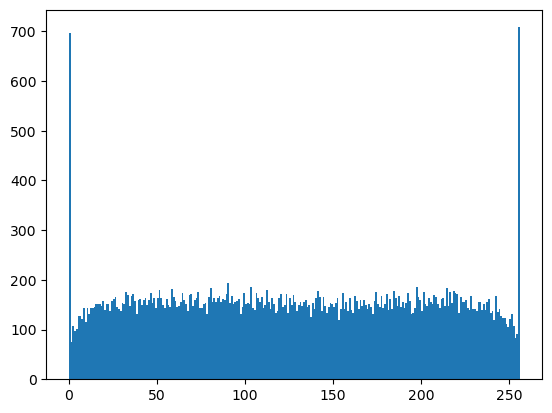

In [23]:


img = cv2.imread(r'cipher_image.jpg', 0)


hist, bins = np.histogram(img.ravel(), 256, [0, 256])


plt.hist(img.ravel(), 256, [0, 256])
plt.show()

In [24]:

img = Image.open("cipher_image.jpg")


gray = np.array(img.convert("L"))


ent = entropy(gray.flatten(), base=2)

print(f"Entropy: {ent}")


Entropy: 14.99147685323951


In [25]:

from Crypto.Cipher import AES

from Crypto.Cipher import PKCS1_OAEP
from Crypto.PublicKey import RSA

with open('bundle.enc', 'rb') as f:
    e_aeskey = f.read(256)
   
    nonce = f.read(16)
    tag = f.read(16)
    e_data = f.read()

with open('private.pem') as f:
    key = f.read()

privkey = RSA.importKey(key)
rsacipher = PKCS1_OAEP.new(privkey)

aeskey = rsacipher.decrypt(e_aeskey)
try:
    aescipher = AES.new(aeskey, AES.MODE_EAX, nonce)
    data = aescipher.decrypt_and_verify(e_data, tag)
except:
    print('Decryption or Authenticity failure')

with open('dec_image.jpg', 'wb') as f:
    f.write(data)
